### 데이터 읽기 및 확인

In [1]:
import numpy as np
import pandas as pd
uselog = pd.read_csv('./database/use_log.csv')
uselog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   log_id       197428 non-null  object
 1   customer_id  197428 non-null  object
 2   usedate      197428 non-null  object
dtypes: object(3)
memory usage: 4.5+ MB


In [2]:
customer = pd.read_csv('./database/customer_join.csv', encoding='cp949')
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        4192 non-null   object 
 1   name               4192 non-null   object 
 2   class              4192 non-null   object 
 3   gender             4192 non-null   object 
 4   start_date         4192 non-null   object 
 5   end_date           1350 non-null   object 
 6   campaign_id        4192 non-null   object 
 7   is_deleted         4192 non-null   int64  
 8   class_name         4192 non-null   object 
 9   price              4192 non-null   int64  
 10  campaign_name      4192 non-null   object 
 11  mean               4192 non-null   float64
 12  median             4192 non-null   float64
 13  max                4192 non-null   int64  
 14  min                4192 non-null   int64  
 15  routine_flg        4192 non-null   int64  
 16  calc_date          4192 

### 클러스터링으로 회원을 그룹화

In [3]:
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,AS002855,XXXX,C03,F,2016-11-01,NaN,CA1,0,2_야간,6000,2_일반,4.500000,5.0,7,2,1,2019-04-30,29
1,AS008805,XXXXX,C01,M,2018-06-07,2019-03-31,CA2,1,0_종일,10500,0_입회비반액할인,4.000000,4.0,8,1,1,2019-03-31,9
2,AS009013,XXXXX,C03,M,2017-08-01,2018-04-30,CA2,1,2_야간,6000,0_입회비반액할인,2.000000,2.0,2,2,0,2018-04-30,8
3,AS009373,XX,C01,F,2015-11-01,NaN,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,41
4,AS015233,XXXXX,C01,M,2018-05-13,NaN,CA2,0,0_종일,10500,0_입회비반액할인,7.545455,7.0,11,4,1,2019-04-30,11


In [4]:
# 한 달에 이용한 횟수의 평균, 중위값, 가장 큰 값, 가장 작은 값
customer_clustering = customer[['mean', 'median', 'max', 'min', 'membership_period']]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.500000,5.0,7,2,29
1,4.000000,4.0,8,1,9
2,2.000000,2.0,2,2,8
3,5.083333,5.0,7,3,41
4,7.545455,7.0,11,4,11


In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler()

In [7]:
# 데이터 표준화 (평균 : 0, 표준편차 : 1)
customer_clustering_sc = sc.fit_transform(customer_clustering)

In [8]:
customer_clustering_sc

array([[-0.46875431, -0.13367635, -0.37992814, -0.5336197 ,  0.73405735],
       [-0.75007656, -0.66710926,  0.08117747, -1.04609022, -0.71035141],
       [-1.87536556, -1.73397508, -2.68545617, -0.5336197 , -0.78257184],
       ...,
       [-0.2343191 ,  0.1330401 ,  0.54228307, -0.5336197 ,  1.09515954],
       [-0.37498023, -0.13367635,  0.08117747, -1.04609022,  0.4451756 ],
       [-0.42186727, -0.66710926, -0.37992814, -0.02114919,  0.37295516]])

In [9]:
# KMeans : 중심점을 반복적으로 업데이트하며 군집을 만든다
# n_clusters : n개의 군집으로 만들기
kmeans = KMeans(n_clusters=4, random_state=0)

In [10]:
clusters = kmeans.fit(customer_clustering_sc)

In [11]:
customer_clustering.loc[:, "cluster"] = clusters.labels_

C:\Users\ysj\AppData\Local\Temp\ipykernel_12400\3014262602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_clustering.loc[:, "cluster"] = clusters.labels_


In [12]:
print(customer_clustering["cluster"].unique())

[2 1 3 0]


In [13]:
customer_clustering.head()

,mean,median,max,min,membership_period,cluster
0,4.500000,5.0,7,2,29,2
1,4.000000,4.0,8,1,9,1
2,2.000000,2.0,2,2,8,3
3,5.083333,5.0,7,3,41,2
4,7.545455,7.0,11,4,11,0


### 클러스터링 결과 분석

In [14]:
customer_clustering.columns = ["월평균값","월중앙값", "월최댓값", "월최솟값","회원기간", "cluster"]
customer_clustering.groupby("cluster").count()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,1072,1072,1072,1072,1072
1,822,822,822,822,822
2,1783,1783,1783,1783,1783
3,515,515,515,515,515


In [15]:
# 0 집단은 회원기간을 제외하면 2 집단과 비슷한 값을 보여준다
# 1 집단은 회원기간이 두번 째로 짧고 나머지 값들이 다 낮은 모습
# 2 집단은 회원기간이 가장 긴 모습 
# 3 집단은 회원기간이 가장 짧지만 값들이 다 높은 모습
customer_clustering.groupby("cluster").mean()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,7.751317,7.728078,9.913246,5.672575,8.722015
1,4.578512,4.223844,8.177616,1.771290,7.126521
2,4.999205,4.997757,7.598990,2.421761,32.858104
3,2.660071,2.607767,3.689320,1.735922,10.031068


In [16]:
cluster_mean = customer_clustering.groupby("cluster").mean()

list(np.round(cluster_mean.loc[:, "월평균값"].values, 2))

[7.75, 4.58, 5.0, 2.66]

In [17]:
# 주성분 분석
from sklearn.decomposition import PCA

In [18]:
X = customer_clustering_sc
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [19]:
# transform: 학습된 PCA 모델을 사용하여 원본 데이터를 변환합니다. 주성분 방향으로 데이터를 재배치합니다.
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df["cluster"] = customer_clustering["cluster"]

In [20]:
pca_df

,0,1,cluster
0,-0.876551,0.600687,2
1,-1.063127,-0.700281,1
2,-3.178508,-1.771675,3
3,-0.625569,1.390301,2
4,2.128072,0.024838,0
...,...,...,...
4187,4.486092,-0.531903,0
4188,2.951256,-0.546587,0
4189,-0.275794,1.225828,2
4190,-0.808838,0.512611,2


In [21]:
customer_clustering["cluster"].unique()

array([2, 1, 3, 0])

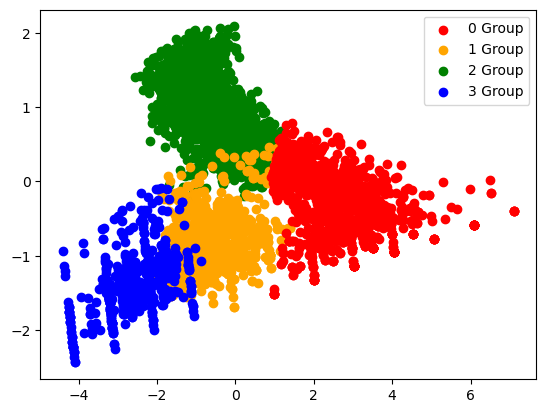

In [22]:
import matplotlib.pyplot as plt

color = ['red', 'orange', 'green', 'blue']

# 0집단 : 빨강
# 1집단 : 주황
# 2집단 : 초록
# 3집단 : 파랑
for i in customer_clustering["cluster"].unique():
    tmp = pca_df.loc[pca_df["cluster"]==i]
    plt.scatter(tmp[0], tmp[1], c=color[i])
for i in range(4):
    plt.scatter([],[],c=color[i], label=f"{i} Group")
plt.legend(loc='upper right')
plt.show()

### 클러스터링 결과를 바탕으로 탈퇴회원의 경향을 파악하자

In [23]:
customer_clustering = pd.concat([customer_clustering, customer], axis=1)

In [24]:
customer_clustering.head()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간,cluster,customer_id,name,class,gender,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,4.500000,5.0,7,2,29,2,AS002855,XXXX,C03,F,...,2_야간,6000,2_일반,4.500000,5.0,7,2,1,2019-04-30,29
1,4.000000,4.0,8,1,9,1,AS008805,XXXXX,C01,M,...,0_종일,10500,0_입회비반액할인,4.000000,4.0,8,1,1,2019-03-31,9
2,2.000000,2.0,2,2,8,3,AS009013,XXXXX,C03,M,...,2_야간,6000,0_입회비반액할인,2.000000,2.0,2,2,0,2018-04-30,8
3,5.083333,5.0,7,3,41,2,AS009373,XX,C01,F,...,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,41
4,7.545455,7.0,11,4,11,0,AS015233,XXXXX,C01,M,...,0_종일,10500,0_입회비반액할인,7.545455,7.0,11,4,1,2019-04-30,11


In [25]:
# 0 집단 : 계속 이용하는 회원과 탈퇴하는 회원들로 갈리는 모습
# 1 집단 : 헬스장 이용이력이 집단들 중 가장 낮고 탈퇴율이 가장 높다
# 2 집단 : 꾸준히 헬스장을 이용하는 회원
# 3 집단 : 헬스장 처음 온 회원
# 2, 3 집단의 탈퇴율이 낮고, 0, 1 집단의 탈퇴 회원 수가 각각 543명, 771명인 모습, 1 집단의 경우 전원 탈퇴했다
# 0 ~ 3 그룹의 탈퇴 여부(0:탈퇴O, 1:탈퇴X) 수 확인
customer_clustering.groupby(["cluster","is_deleted"],as_index=False).count()[["cluster","is_deleted","customer_id"]]

,cluster,is_deleted,customer_id
0,0,0,1035
1,0,1,37
2,1,0,40
3,1,1,782
4,2,0,1767
5,2,1,16
6,3,1,515


### 다음달의 이용횟수 예측을 위해 데이터를 준비

In [26]:
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [27]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["연월"] = uselog["usedate"].dt.strftime("%Y%m")

In [28]:
uselog.head()

,log_id,customer_id,usedate,연월
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804


In [29]:
uselog_months = uselog.groupby(["연월", 'customer_id'],as_index=False).count()

In [30]:
# usedate : 0 ~ 6 / 월요일 : 0, 화요일 : 1 ... 일요일 : 6
uselog_months

,연월,customer_id,log_id,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7
...,...,...,...,...
36837,201903,TS995853,8,8
36838,201903,TS998593,8,8
36839,201903,TS999079,3,3
36840,201903,TS999231,6,6


In [31]:
# 고객이 연월에 몇번 사용했는지의 데이터
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [32]:
year_months = list(uselog_months["연월"].unique())
predict_data = pd.DataFrame()

In [33]:
year_months

['201804',
 '201805',
 '201806',
 '201807',
 '201808',
 '201809',
 '201810',
 '201811',
 '201812',
 '201901',
 '201902',
 '201903']

In [34]:
# 6부터 11까지 len(year_months) = 12
for i in range(6, len(year_months)):
    # 2018년 10월부터 2019년 3월까지의 데이터만
    tmp = uselog_months.loc[uselog_months["연월"]==year_months[i]]
    # count 칼럼 이름 변경
    tmp = tmp.rename(columns={"count":"count_pred"})

    # 1부터 6까지
    for j in range(1, 7):
        # 6개월 전부터 1개월 전까지
        tmp_before = uselog_months.loc[uselog_months["연월"]==year_months[i-j]]
        del tmp_before["연월"]
        tmp_before = tmp_before.rename(columns={"count":"count_{}".format(j-1)})
        tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")

    # 6개월 전부터 1개월 전까지 데이터 결합
    predict_data = pd.concat([predict_data, tmp], ignore_index=True)
predict_data.head()

# count_0 : 1개월 전 이용횟수, count_1 : 2개월 전 이용횟수...

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS008805,2,2.0,5.0,7.0,8.0,NaN,NaN
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
3,201810,AS015233,7,9.0,11.0,5.0,7.0,7.0,NaN
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0


In [35]:
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18310 entries, 0 to 18309
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   연월           18310 non-null  object 
 1   customer_id  18310 non-null  object 
 2   count_pred   18310 non-null  int64  
 3   count_0      17793 non-null  float64
 4   count_1      17253 non-null  float64
 5   count_2      16711 non-null  float64
 6   count_3      16174 non-null  float64
 7   count_4      15667 non-null  float64
 8   count_5      15113 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.3+ MB


In [36]:
# Nan있는 데이터 버리기
predict_data = predict_data.dropna()

In [37]:
predict_data

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
5,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0
7,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...
18304,201903,TS995299,3,3.0,5.0,4.0,5.0,4.0,5.0
18306,201903,TS998593,8,7.0,8.0,7.0,9.0,9.0,9.0
18307,201903,TS999079,3,2.0,6.0,9.0,6.0,6.0,4.0
18308,201903,TS999231,6,6.0,3.0,8.0,5.0,5.0,4.0


In [38]:
# reset_index(drop=True) : True로 설정하면 기존 인덱스를 데이터프레임의 열로 추가하지 않고 제거합니다
predict_data = predict_data.reset_index(drop=True)
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0


### 특징이 되는 변수 추가

In [39]:
# 등록 일자 추가
predict_data = pd.merge(predict_data, customer[["customer_id","start_date"]], on="customer_id", how="left")
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01


In [40]:
# 데이터 타입 변경
predict_data["now_date"] = pd.to_datetime(predict_data["연월"], format="%Y%m")
predict_data["start_date"] = pd.to_datetime(predict_data["start_date"])

In [41]:
predict_data

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01
...,...,...,...,...,...,...,...,...,...,...,...
15108,201903,TS995299,3,3.0,5.0,4.0,5.0,4.0,5.0,2015-09-01,2019-03-01
15109,201903,TS998593,8,7.0,8.0,7.0,9.0,9.0,9.0,2018-09-01,2019-03-01
15110,201903,TS999079,3,2.0,6.0,9.0,6.0,6.0,4.0,2016-06-01,2019-03-01
15111,201903,TS999231,6,6.0,3.0,8.0,5.0,5.0,4.0,2017-03-01,2019-03-01


In [42]:
# dateutil.relativedelta : 날짜와 시간 간의 상대적인 차이를 계산할 수 있는 기능을 제공
from dateutil.relativedelta import relativedelta

In [43]:
# period : 기간
predict_data["period"] = None

In [44]:
for i in range(len(predict_data)):
    delta = relativedelta(predict_data["now_date"][i], predict_data["start_date"][i])
    predict_data.iloc[i, -1] = delta.years*12 + delta.months
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01,23
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01,35
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01,39
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01,16
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01,12


In [45]:
predict_data = predict_data.loc[predict_data["start_date"]>=pd.to_datetime("20180401")]

In [47]:
# 선형 모델
from sklearn import linear_model
import sklearn.model_selection

# 선형 회귀
model = linear_model.LinearRegression()

In [48]:
# X = 1개월 전 부터 6개월 전까지 이용횟수
X = predict_data[["count_0","count_1","count_2","count_3","count_4","count_5","period"]]
# y = 이번달에 이용횟수
y = predict_data["count_pred"]

In [49]:
# 학습 데이터, 훈련 데이터 나누기
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, shuffle=True, random_state=0)
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# 예측 확률 60% 정도
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6111525903215709
0.5964633323568844


### 모델에 기여하는 변수 확인

In [52]:
# 전 달에 같은 요일에 이용한 횟수가 가장 영향을 많이 끼침, 등록 기간은 거의 영향을 못끼친 모습
coef = pd.DataFrame({"feature_names":X.columns, "coefficient":model.coef_})
coef

,feature_names,coefficient
0,count_0,0.359133
1,count_1,0.181937
2,count_2,0.151177
3,count_3,0.184593
4,count_4,0.076946
5,count_5,0.058731
6,period,0.047007


In [53]:
x1 = [3, 4, 4, 6, 8, 7, 8]
x2 = [2, 2, 3, 3, 4, 6, 8]
x_pred = [x1, x2]

In [54]:
model.predict(x_pred)

c:\ProgramData\anaconda3\envs\churn\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.77011036, 1.97563148])

In [51]:
uselog_months.to_csv("use_log_months.csv",index=False, encoding="cp949")